In [1]:
import pandas as pd

In [2]:

prepare_prior = pd.read_csv('order_products__prior.csv')
prepare_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [3]:
prepare_train = pd.read_csv('order_products__train.csv')
prepare_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [4]:
# merge two tables
prepare_pt = prepare_prior.merge(prepare_train,how='outer')

In [5]:
prepare_pt.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
# using groupby and count() to count the number of products for every orders
order_product_num = prepare_pt.groupby('order_id').count()
order_product_num.head()

,product_id,add_to_cart_order,reordered
order_id,,,
1,8,8,8
2,9,9,9
3,8,8,8
4,13,13,13
5,26,26,26


In [7]:
# formulate the 'order_product_num' table, in order to merge with the orders.csv table
order_product_num.drop(['add_to_cart_order','reordered'],axis=1,inplace=True)
# modify the column name 'product_id' to 'product_count'
order_product_num = order_product_num.rename(columns={'product_id':'product_count'})
order_product_num.head()

,product_count
order_id,
1,8
2,9
3,8
4,13
5,26


In [8]:
orders_raw = pd.read_csv('orders.csv')
orders_raw.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_date
0,2539329,1,prior,1,2,8,-1.0,20160105
1,2398795,1,prior,2,3,7,15.0,20160120
2,473747,1,prior,3,3,12,21.0,20160210
3,2254736,1,prior,4,4,7,29.0,20160310
4,431534,1,prior,5,4,15,28.0,20160407


In [9]:
orders_raw = orders_raw.merge(order_product_num, how='inner',on='order_id')
orders_raw.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_date,product_count
0,2539329,1,prior,1,2,8,-1.0,20160105,5
1,2398795,1,prior,2,3,7,15.0,20160120,6
2,473747,1,prior,3,3,12,21.0,20160210,5
3,2254736,1,prior,4,4,7,29.0,20160310,5
4,431534,1,prior,5,4,15,28.0,20160407,8
5,3367565,1,prior,6,2,7,19.0,20160426,4
6,550135,1,prior,7,1,9,20.0,20160516,5
7,3108588,1,prior,8,1,14,14.0,20160530,6
8,2295261,1,prior,9,1,16,0.0,20160530,6
9,2550362,1,prior,10,3,8,30.0,20160629,9


In [10]:
orders_raw.groupby('order_date').sum()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_count
order_date,,,,,,,
20160101,11325015378,637733110,113664,32880,87990,68433.0,66793
20160102,11650010742,664002613,114222,41184,92502,69461.0,69348
20160103,12311633895,704973498,126346,50743,97874,73967.0,74928
20160104,12909853205,729899306,126797,7525,100688,77540.0,77118
20160105,13409610834,744965569,131489,15506,104163,80287.0,77458
20160106,14266179993,804360145,144256,24885,112052,85469.0,84157
20160107,14989057264,855453642,148155,35156,118437,90039.0,89620
20160108,15994511424,901595980,163224,47055,127208,95997.0,95676
20160109,17234346271,968755114,172311,60114,134916,102479.0,102387


In [11]:
orders=orders_raw.drop(['order_id','eval_set','order_number'],axis=1)
orders.head()

,user_id,order_dow,order_hour_of_day,days_since_prior_order,order_date,product_count
0,1,2,8,-1.0,20160105,5
1,1,3,7,15.0,20160120,6
2,1,3,12,21.0,20160210,5
3,1,4,7,29.0,20160310,5
4,1,4,15,28.0,20160407,8


In [12]:
# orders.to_csv('Data_for_prediction.csv',index=False)

In [13]:
# orders.groupby('order_date').mean()

In [14]:

X=orders.drop(['order_dow','order_date'],axis=1)
Y=orders['order_dow']

In [15]:
# from sklearn.decomposition import PCA
# transfer = PCA(n_components=0.90)
# xT = transfer.fit_transform(X)

In [16]:
# split the train data and test data using train_test_split()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=22)

In [17]:
# Standard the data using standardScalar
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [18]:
# I use random forest algorithm to predict the results
# Import the RandomForestClassifier & GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
# RF框架参数意义
# n_estimators:对原始数据集进行有放回抽样生成的子数据集个数，即决策树的个数。若n_estimators太小容易欠拟合，太大不能显著的提升模型，所以n_estimators选择适中的数值，版本0.20的默认值是10,版本0.22的默认值是100。
# bootstrap:是否对样本集进行有放回抽样来构建树，True表示是,默认值True。
# oob_score:是否采用袋外样本来评估模型的好坏，True代表是，默认值False,袋外样本误差是测试数据集误差的无偏估计，所以推荐设置True。
# RF框架的参数很少，框架参数择优一般是调节n_estimators值，即决策树个数。

# name the randomForestClassifier as estimator
estimator = RandomForestClassifier(n_estimators=10, oob_score=True, bootstrap=True, random_state=10)

# Use grid search & cross validation
# Preparing the parameters

# param_dict  = {"n_estimators" : [5, 10, 15, 20, 25], "max_depth" : [4, 8, 10, 14, 18, 22, 26]}
# estimator = GridSearchCV(estimator, param_grid = param_dict, cv=5)
estimator.fit(x_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=False)

In [20]:
y_predict = estimator.predict(x_test)

In [21]:
print(y_predict==y_test)

2981486    False
1467102    False
1899469    False
2579389    False
1768871    False
333562      True
2187149    False
2852806    False
2210030    False
2693252    False
2370885    False
244663      True
922587     False
855525     False
1754093    False
536292     False
1551385    False
84386      False
277258     False
2448012    False
549855     False
1661429    False
2463642    False
2231770    False
1668212    False
2400443    False
3012129    False
1958230    False
2201162    False
940958     False
           ...  
1932634    False
699092     False
2825840    False
357772     False
1023134    False
331683     False
167364     False
1515472    False
1753715    False
138478     False
2812720    False
2552987     True
2019906    False
2406223    False
1807761    False
1778516     True
2237052    False
778529     False
1201621    False
2741391    False
159071     False
642288     False
1025010    False
334464     False
1723379    False
807560     False
2073037    False
607146      Tr

In [22]:
score = estimator.score(x_test, y_test)
score

0.14358738082069042

In [23]:
# measure accuracy of the model

from sklearn.metrics import classification_report
report = classification_report(y_test,y_predict,labels=[1,2,3,4,5,6,7],target_names=["星期一","星期二","星期三","星期四","星期五","星期六","星期日"])
print(report)

# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn.tree import RandomForestClassifier, export_graphviz
# export_graphviz(estimator,out_file="tree.dot")

              precision    recall  f1-score   support

         星期一       0.14      0.16      0.15    133140
         星期二       0.14      0.15      0.15    133390
         星期三       0.14      0.15      0.14    133169
         星期四       0.14      0.14      0.14    132568
         星期五       0.15      0.14      0.14    135808
         星期六       0.14      0.13      0.14    136739
         星期日       0.15      0.13      0.14    137149

    accuracy                           0.14    941963
   macro avg       0.14      0.14      0.14    941963
weighted avg       0.14      0.14      0.14    941963



In [29]:
# make a new prediction based on the model above
prediction_prepare = pd.read_csv('Data_for_prediction.csv')
prediction_prepare.head()

,user_id,order_hour_of_day,days_since_prior_order,product_count
0,168231,14,4.0,9
1,124694,22,30.0,7
2,139178,20,6.0,15
3,89102,21,1.0,8
4,10355,15,0.0,3


In [30]:
len(prediction_prepare)

500

In [31]:
new_prediction = estimator.predict(prediction_prepare)
new_prediction

array([4, 4, 4, 3, 6, 4, 4, 4, 4, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3,
       4, 3, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 6, 3, 3, 4, 4, 3, 3, 4, 3, 4, 4,
       3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 3, 3, 3, 4, 4, 3, 3, 4, 4, 4, 4, 6, 4, 4, 3, 4, 3, 3, 3, 3,
       4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3, 4,
       4, 3, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 3,
       4, 3, 4, 3, 4, 4, 6, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4,
       4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 6, 4, 3, 4, 4,
       3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 4,

In [32]:
# merge two table and prepare to the next step
prediction_prepare['order_dow']=new_prediction
predict_table = prediction_prepare
predict_table

,user_id,order_hour_of_day,days_since_prior_order,product_count,order_dow
0,168231,14,4.0,9,4
1,124694,22,30.0,7,4
2,139178,20,6.0,15,4
3,89102,21,1.0,8,3
4,10355,15,0.0,3,6
5,105531,19,30.0,17,4
6,115888,8,9.0,13,4
7,20074,9,30.0,7,4
8,84515,16,12.0,13,4
9,131696,10,14.0,5,3


In [33]:
# sum() the total product number for order_dow
sum_table = predict_table.groupby('order_dow').sum()

,user_id,order_hour_of_day,days_since_prior_order,product_count
order_dow,,,,
3,12552405,2143,1148.0,611
4,33792430,4891,4823.0,4144
6,113905,165,0.0,33


In [34]:
dow = [1,2,3,4,5,6,7]
product_count = [0,0,611,4144,0,33,0]

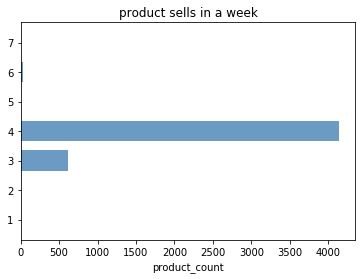

In [37]:
#draw graph
import matplotlib.pyplot as plt
import matplotlib

# matplotlib.rcParams['font.sans-serif'] = ['SimHei']
# matplotlib.rcParams['axes.unicode_minus'] = False

# price = [39.5, 39.9, 45.4, 38.9, 33.34]
"""
绘制水平条形图方法barh
参数一：y轴
参数二：x轴
"""
plt.barh(dow, product_count, height=0.7, color='steelblue', alpha=0.8)      # 从下往上画
plt.yticks(dow, [1,2,3,4,5,6,7])
# plt.xlim(30,47)
plt.xlabel("product_count")
plt.title("product sells in a week")
# for x, y in enumerate(price):
#     plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.show()
